In [1]:
import numpy as np
import matplotlib.pyplot as plt
import FRCfuncs
from scipy.optimize import curve_fit

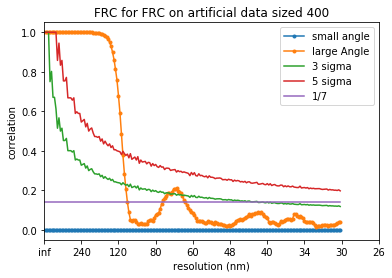

retrieved resolution for FRC on artificial data sized 400 is: 107nm



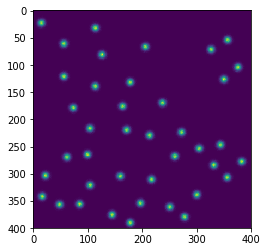

In [20]:
size  = 400 #number of pixels in image
Nspots = 40 # number of spots
spotSigma = 4 #sigma of gaussian spot
spotAmplitude = 500
background = 0
avoidEdges = True #if True, minimum distance of spot center to edge is 2 * spotSigma
avoidNeighbour = True #if True, center of two spots are at least 4 sigma apart

spotLst = FRCfuncs.createSpotLst(size, Nspots, spotSigma, avoidEdges, avoidNeighbour)
imA = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background, UsePoisson = True)
imB = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background, UsePoisson = True)

_, _, _, _, _, res = FRCfuncs.FRCAnalysis(imA, imB, 15, title = 'FRC on artificial data sized %d' % size, correctDrift = False)
plt.imshow(imA)

In [21]:
#np.savetxt('ArtificialdataSigma_4px__float.txt', imA, delimiter = '\t')
np.savetxt('GaussDat2D_amplitude500_40spots_sigma_4x4_PoissonNoise.txt', imA.astype(np.int), delimiter = '\t')
np.savetxt('GaussDat2D_amplitude500_40spots_sigma_4x4_PoissonNoise_BeadLst.txt', spotLst, delimiter = '\t')

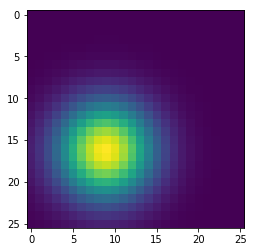

In [25]:
size  = 26 #number of pixels in image
Nspots = 1 # number of spots
spotSigma = 4 #sigma of gaussian spot
spotAmplitude = 50
background = 1
avoidEdges = True #if True, minimum distance of spot center to edge is 2 * spotSigma
avoidNeighbour = True #if True, center of two spots are at least 4 sigma apart

spotLst = FRCfuncs.createSpotLst(size, Nspots, spotSigma, avoidEdges, avoidNeighbour)
imA = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background)
plt.imshow(imA)

In [27]:
x = np.arange(imA.shape[0])
y = np.arange(imB.shape[0])
coord = np.meshgrid(x, y)

p0 = (50, 10, 15, 4, 4, 0, 0)

#perform 2D gauss fit
popt, pcov = curve_fit(FRCfuncs.twoD_Gaussian, imA.ravel(), abs(corr).ravel(), p0=p0)

In [28]:
popt[]

array([ 1.33694608e+05, -8.12379024e+02, -7.58737118e+02,  1.12734247e+03,
        3.12894332e+02, -1.41915559e-01,  3.66521576e+03])

TypeError: imsave() missing 1 required positional argument: 'arr'

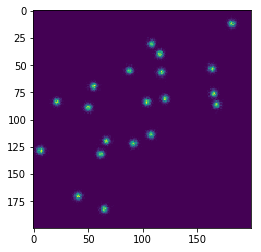

In [16]:
plt.imshow(imA)
plt.imsave('Artificialdata.tiff')

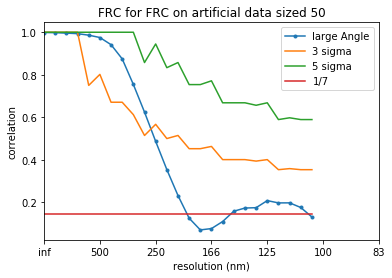

retrieved resolution for FRC on artificial data sized 50 is: 192nm



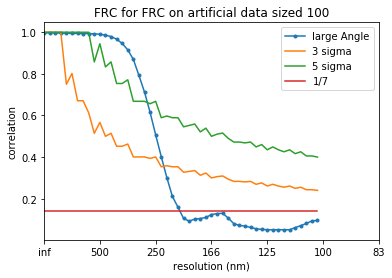

retrieved resolution for FRC on artificial data sized 100 is: 200nm



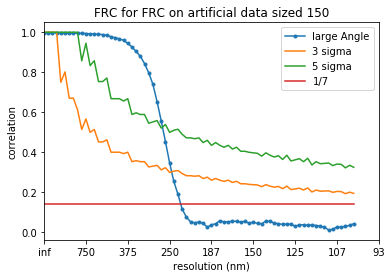

retrieved resolution for FRC on artificial data sized 150 is: 227nm



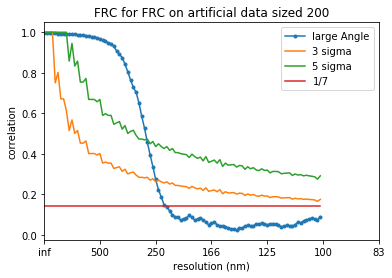

retrieved resolution for FRC on artificial data sized 200 is: 227nm



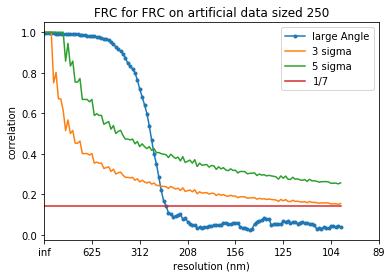

retrieved resolution for FRC on artificial data sized 250 is: 245nm



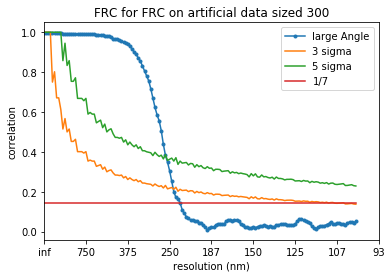

retrieved resolution for FRC on artificial data sized 300 is: 227nm



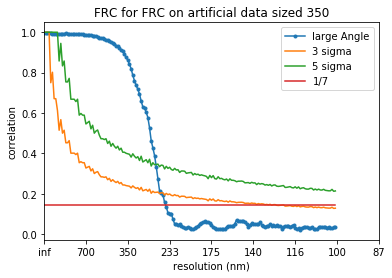

retrieved resolution for FRC on artificial data sized 350 is: 240nm



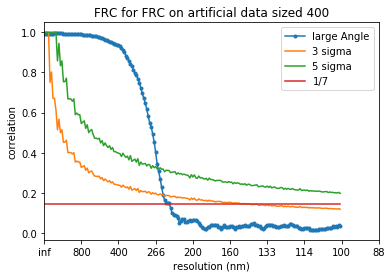

retrieved resolution for FRC on artificial data sized 400 is: 235nm



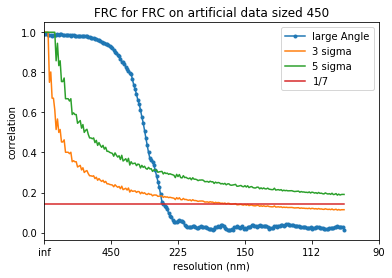

retrieved resolution for FRC on artificial data sized 450 is: 253nm



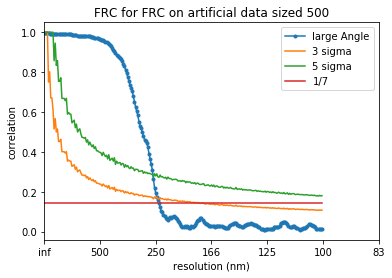

retrieved resolution for FRC on artificial data sized 500 is: 243nm



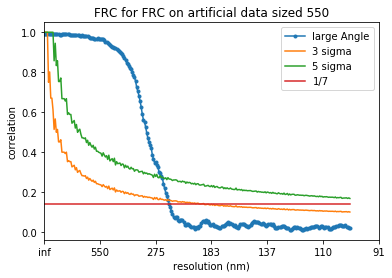

retrieved resolution for FRC on artificial data sized 550 is: 246nm



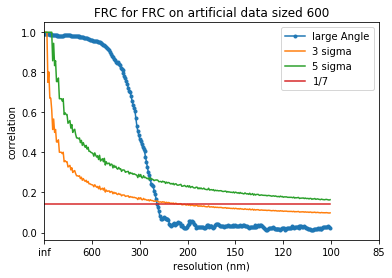

retrieved resolution for FRC on artificial data sized 600 is: 254nm



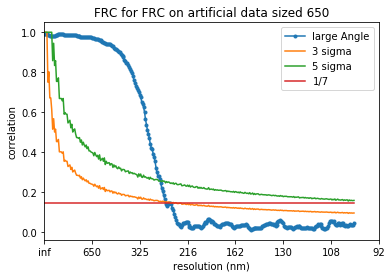

retrieved resolution for FRC on artificial data sized 650 is: 256nm



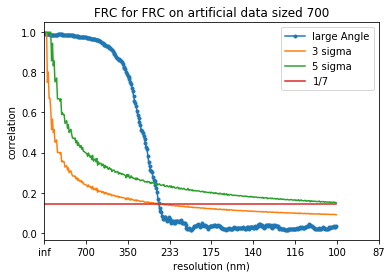

retrieved resolution for FRC on artificial data sized 700 is: 254nm



In [86]:
resLst = []
sizes = np.arange(50,701,50)
for size in sizes:
    Nspots = int(size/5) # number of spots
    spotSigma = 2 #sigma of gaussian spot
    spotAmplitude = 50
    background = 5
    avoidEdges = False #if True, minimum distance of spot center to edge is 2 * spotSigma
    avoidNeighbour = False #if True, center of two spots are at least 4 sigma apart

    spotLst = FRCfuncs.createSpotLst(size, Nspots, spotSigma, avoidEdges, avoidNeighbour)
    imA = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background)
    imB = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background)

    _, _, _, _, _, res = FRCfuncs.FRCAnalysis(imA, imB, 50, title = 'FRC on artificial data sized %d' % size)
    resLst.append(res)

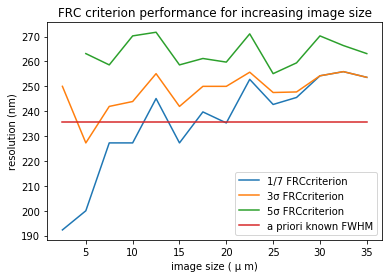

In [88]:
dat = np.zeros((len(resLst),3))
for i, el in enumerate(resLst):
    dat[i] = el[:,0]
imsizes = sizes * 0.05
FWHM = [2.3548 * spotSigma *50 ] * len(imsizes)
plt.plot(imsizes,dat[:,0], label = "1/7 FRCcriterion")
plt.plot(imsizes,dat[:,1], label = u"3\u03C3 FRCcriterion")
plt.plot(imsizes[1:],dat[:,2][1:], label = u"5\u03C3 FRCcriterion")
plt.plot(imsizes, FWHM, label = 'a priori known FWHM')
plt.title("FRC criterion performance for increasing image size")
plt.ylabel("resolution (nm)")
plt.xlabel(u"image size ( \u03BC m)")
plt.legend()
plt.savefig('imsize_effect.png', dpi = 300)

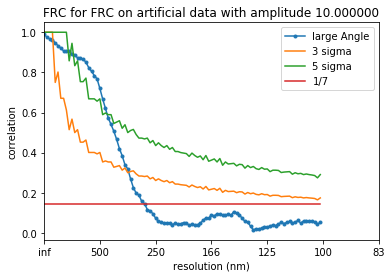

retrieved resolution for FRC on artificial data with amplitude 10.000000 is: 270nm



TypeError: append() takes no keyword arguments

In [85]:
resLst = []
spotAmplitudes = np.arange(10,401,10)
for spotAmplitude in spotAmplitudes:
    size = 200
    Nspots = int(size/5) # number of spots
    spotSigma = 2 #sigma of gaussian spot
    background = 5
    avoidEdges = False #if True, minimum distance of spot center to edge is 2 * spotSigma
    avoidNeighbour = False #if True, center of two spots are at least 4 sigma apart

    spotLst = FRCfuncs.createSpotLst(size, Nspots, spotSigma, avoidEdges, avoidNeighbour)
    imA = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background)
    imB = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background)

    _, _, _, _, _, res = FRCfuncs.FRCAnalysis(imA, imB, 50, title = 'FRC on artificial data with amplitude %f' % spotAmplitude)
    resLst.append(res, dpi = 300)

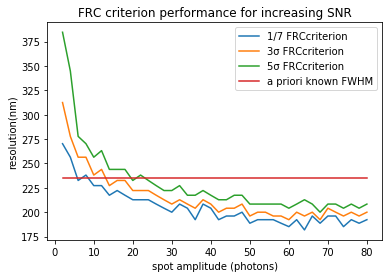

In [81]:
dat = np.zeros((len(resLst),3))
for i, el in enumerate(resLst):
    dat[i] = el[:,0]
FWHM = [2.3548 * spotSigma *50 ] * len(spotAmplitudes)
SNR = spotAmplitudes / 5
plt.plot(SNR[0:],dat[:,0][0:], label = "1/7 FRCcriterion")
plt.plot(SNR[0:],dat[:,1][0:], label = u"3\u03C3 FRCcriterion")
plt.plot(SNR[0:],dat[:,2][0:], label = u"5\u03C3 FRCcriterion")
plt.plot(SNR, FWHM, label = 'a priori known FWHM')
plt.title("FRC criterion performance for increasing SNR")
plt.ylabel("resolution(nm)")
plt.xlabel(u"spot amplitude (photons)")
plt.legend()
plt.savefig('spot_amplitude_effect.png', dpi = 300)

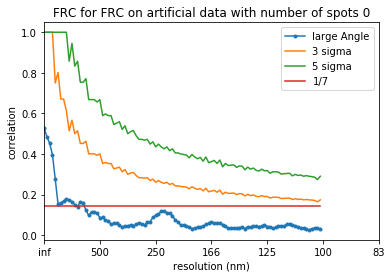

retrieved resolution for FRC on artificial data with number of spots 0 is: 833nm



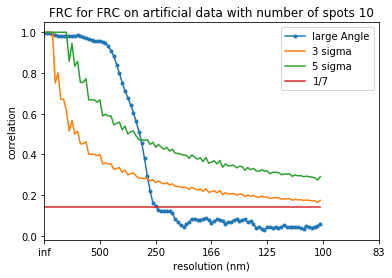

retrieved resolution for FRC on artificial data with number of spots 10 is: 244nm



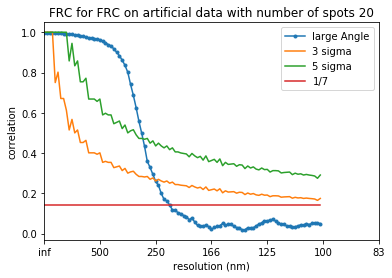

retrieved resolution for FRC on artificial data with number of spots 20 is: 222nm



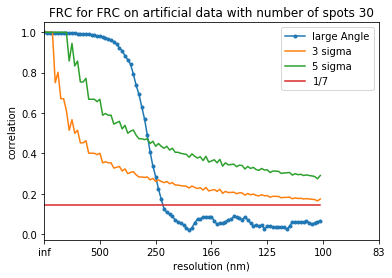

retrieved resolution for FRC on artificial data with number of spots 30 is: 233nm



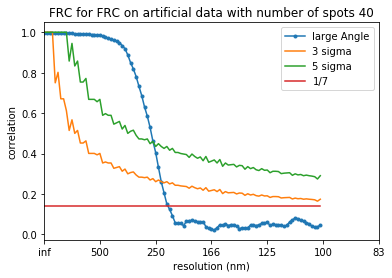

retrieved resolution for FRC on artificial data with number of spots 40 is: 222nm



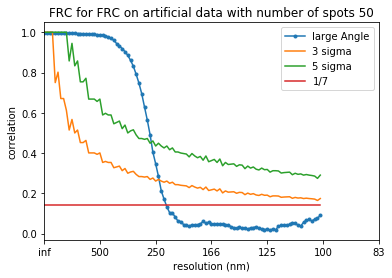

retrieved resolution for FRC on artificial data with number of spots 50 is: 227nm



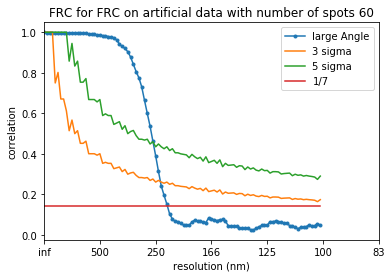

retrieved resolution for FRC on artificial data with number of spots 60 is: 222nm



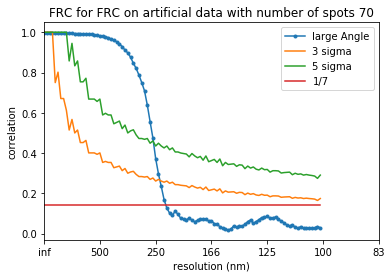

retrieved resolution for FRC on artificial data with number of spots 70 is: 227nm



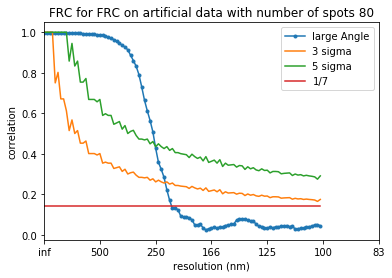

retrieved resolution for FRC on artificial data with number of spots 80 is: 217nm



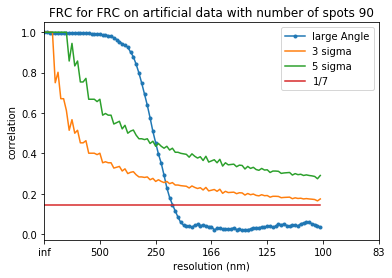

retrieved resolution for FRC on artificial data with number of spots 90 is: 213nm



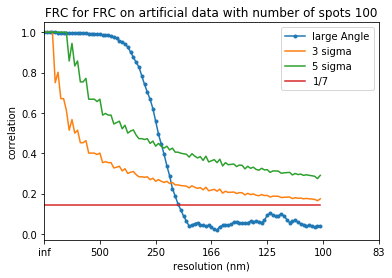

retrieved resolution for FRC on artificial data with number of spots 100 is: 204nm



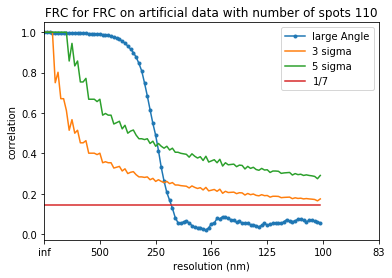

retrieved resolution for FRC on artificial data with number of spots 110 is: 217nm



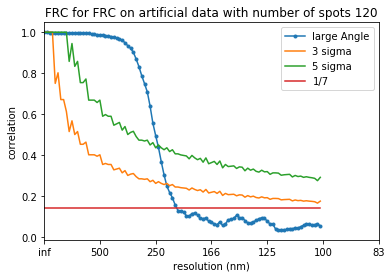

retrieved resolution for FRC on artificial data with number of spots 120 is: 208nm



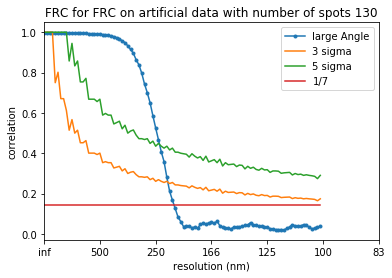

retrieved resolution for FRC on artificial data with number of spots 130 is: 213nm



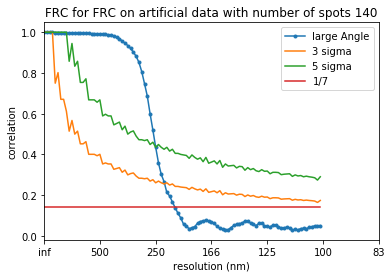

retrieved resolution for FRC on artificial data with number of spots 140 is: 213nm



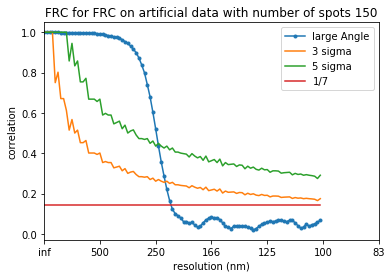

retrieved resolution for FRC on artificial data with number of spots 150 is: 217nm



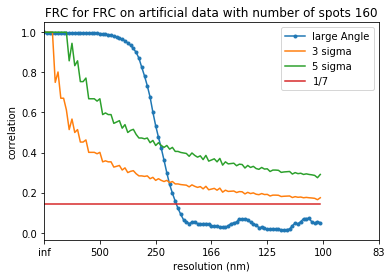

retrieved resolution for FRC on artificial data with number of spots 160 is: 208nm



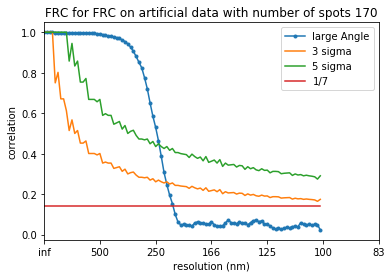

retrieved resolution for FRC on artificial data with number of spots 170 is: 213nm



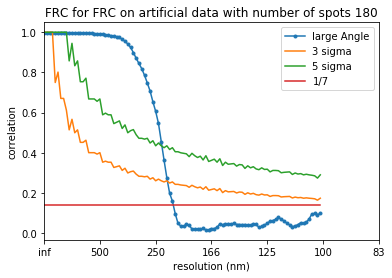

retrieved resolution for FRC on artificial data with number of spots 180 is: 213nm



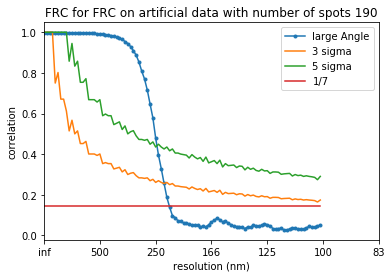

retrieved resolution for FRC on artificial data with number of spots 190 is: 222nm



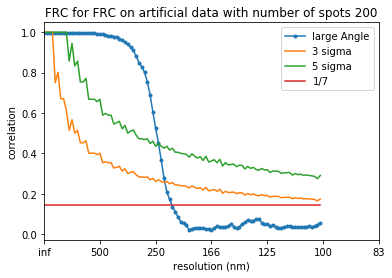

retrieved resolution for FRC on artificial data with number of spots 200 is: 217nm



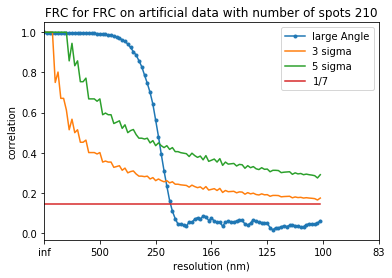

retrieved resolution for FRC on artificial data with number of spots 210 is: 217nm



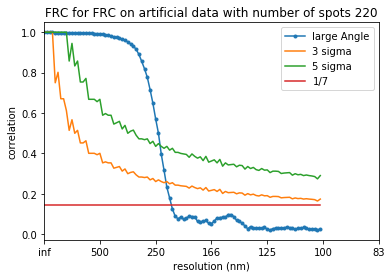

retrieved resolution for FRC on artificial data with number of spots 220 is: 217nm



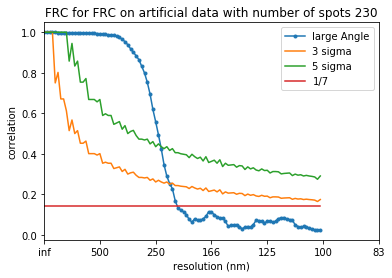

retrieved resolution for FRC on artificial data with number of spots 230 is: 208nm



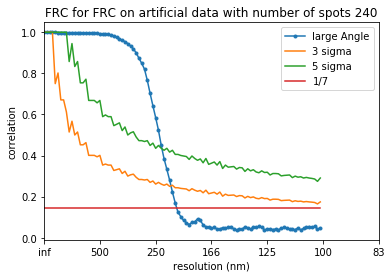

retrieved resolution for FRC on artificial data with number of spots 240 is: 208nm



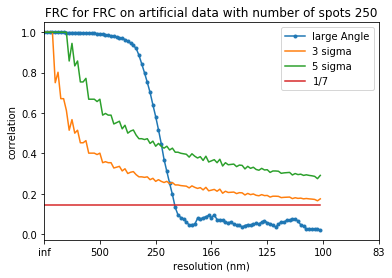

retrieved resolution for FRC on artificial data with number of spots 250 is: 213nm



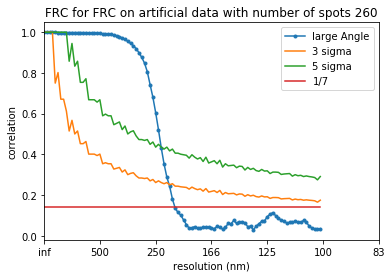

retrieved resolution for FRC on artificial data with number of spots 260 is: 213nm



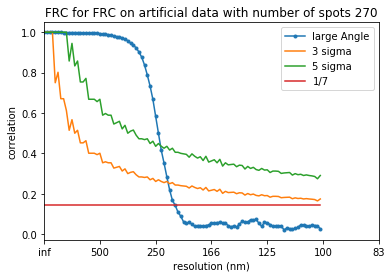

retrieved resolution for FRC on artificial data with number of spots 270 is: 213nm



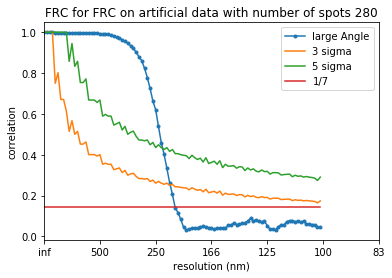

retrieved resolution for FRC on artificial data with number of spots 280 is: 213nm



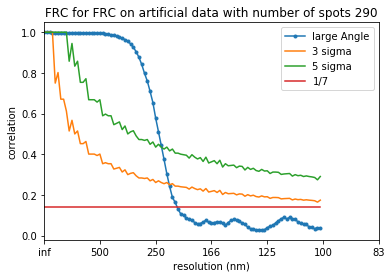

retrieved resolution for FRC on artificial data with number of spots 290 is: 208nm



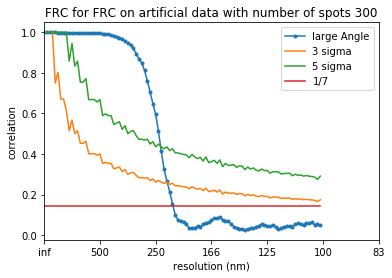

retrieved resolution for FRC on artificial data with number of spots 300 is: 213nm



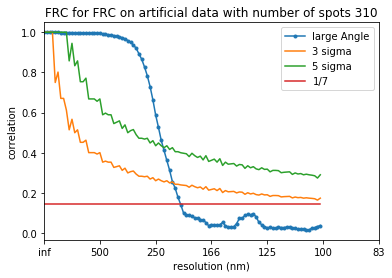

retrieved resolution for FRC on artificial data with number of spots 310 is: 204nm



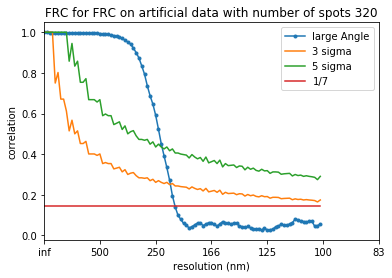

retrieved resolution for FRC on artificial data with number of spots 320 is: 213nm



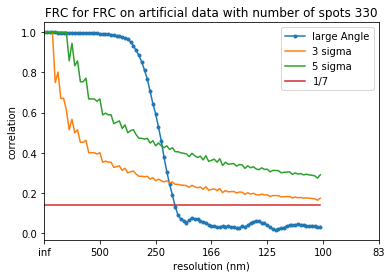

retrieved resolution for FRC on artificial data with number of spots 330 is: 213nm



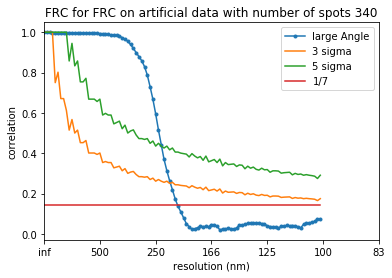

retrieved resolution for FRC on artificial data with number of spots 340 is: 208nm



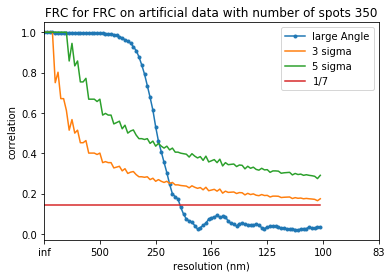

retrieved resolution for FRC on artificial data with number of spots 350 is: 204nm



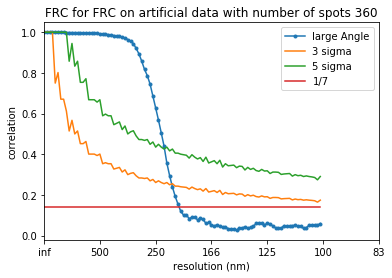

retrieved resolution for FRC on artificial data with number of spots 360 is: 204nm



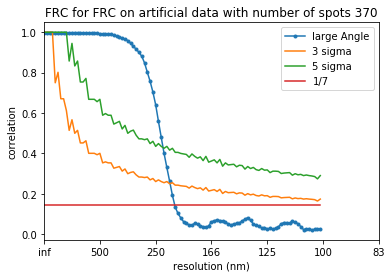

retrieved resolution for FRC on artificial data with number of spots 370 is: 213nm



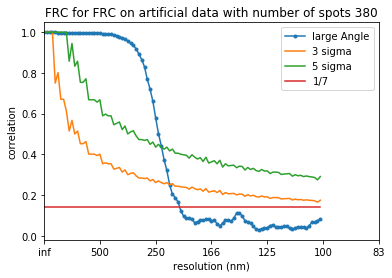

retrieved resolution for FRC on artificial data with number of spots 380 is: 204nm



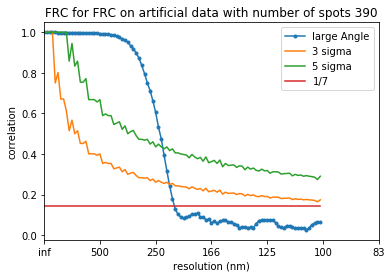

retrieved resolution for FRC on artificial data with number of spots 390 is: 213nm



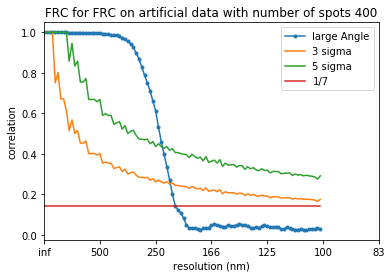

retrieved resolution for FRC on artificial data with number of spots 400 is: 208nm



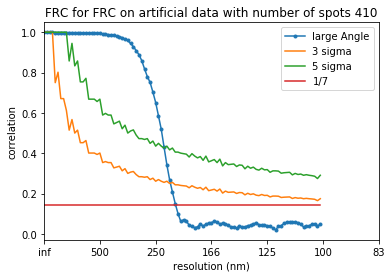

retrieved resolution for FRC on artificial data with number of spots 410 is: 208nm



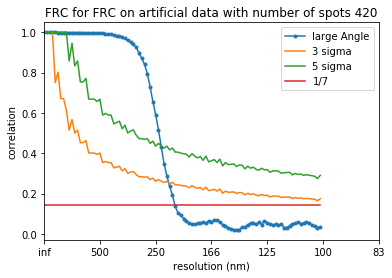

retrieved resolution for FRC on artificial data with number of spots 420 is: 213nm



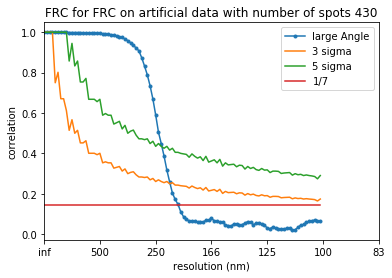

retrieved resolution for FRC on artificial data with number of spots 430 is: 204nm



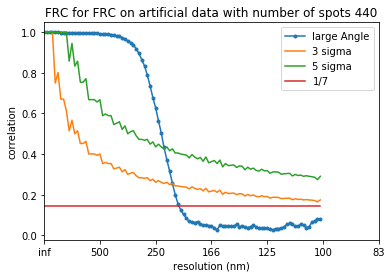

retrieved resolution for FRC on artificial data with number of spots 440 is: 204nm



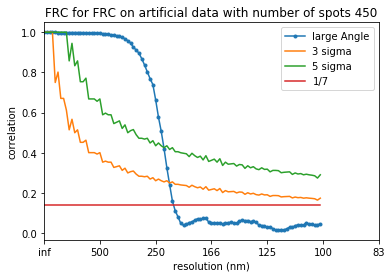

retrieved resolution for FRC on artificial data with number of spots 450 is: 213nm



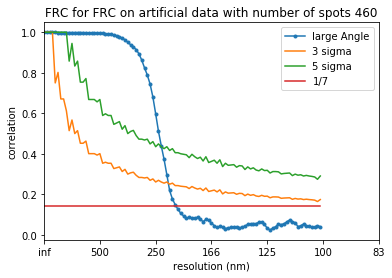

retrieved resolution for FRC on artificial data with number of spots 460 is: 208nm



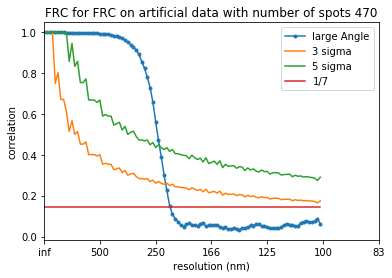

retrieved resolution for FRC on artificial data with number of spots 470 is: 217nm



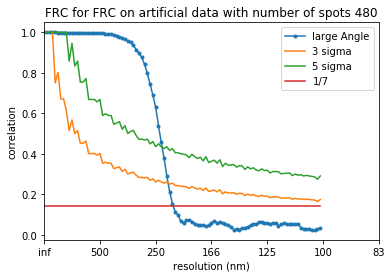

retrieved resolution for FRC on artificial data with number of spots 480 is: 213nm



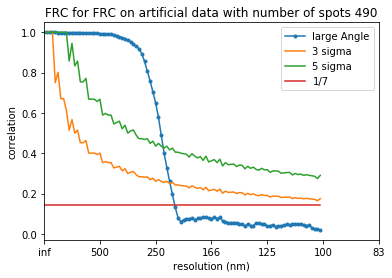

retrieved resolution for FRC on artificial data with number of spots 490 is: 213nm



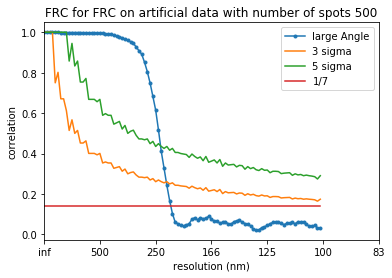

retrieved resolution for FRC on artificial data with number of spots 500 is: 217nm



In [83]:
resLst = []
Nspots = np.arange(0,501,10)
for Nspot in Nspots:
    size = 200
    spotAmplitude = 50
    spotSigma = 2 #sigma of gaussian spot
    background = 5
    avoidEdges = False #if True, minimum distance of spot center to edge is 2 * spotSigma
    avoidNeighbour = False #if True, center of two spots are at least 4 sigma apart

    spotLst = FRCfuncs.createSpotLst(size, Nspot, spotSigma, avoidEdges, avoidNeighbour)
    imA = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background)
    imB = FRCfuncs.createBeadImg(size, spotLst, spotSigma, spotAmplitude, background)

    _, _, _, _, _, res = FRCfuncs.FRCAnalysis(imA, imB, 50, title = 'FRC on artificial data with number of spots %d' % Nspot)
    resLst.append(res)

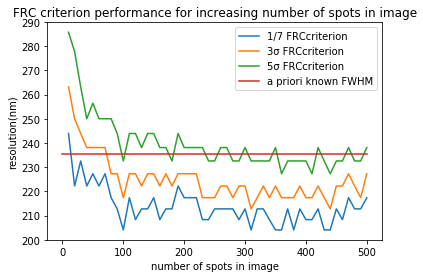

In [84]:
dat = np.zeros((len(resLst),3))
for i, el in enumerate(resLst):
    dat[i] = el[:,0]
FWHM = [2.3548 * spotSigma *50 ] * len(Nspots)
plt.plot(Nspots[1:],dat[:,0][1:], label = "1/7 FRCcriterion")
plt.plot(Nspots[1:],dat[:,1][1:], label = u"3\u03C3 FRCcriterion")
plt.plot(Nspots[1:],dat[:,2][1:], label = u"5\u03C3 FRCcriterion")
plt.plot(Nspots, FWHM, label = 'a priori known FWHM')
plt.title("FRC criterion performance for increasing number of spots in image")
plt.ylabel("resolution(nm)")
plt.xlabel(u"number of spots in image")
plt.legend()
plt.savefig('Nspot_effect.png', dpi = 300)

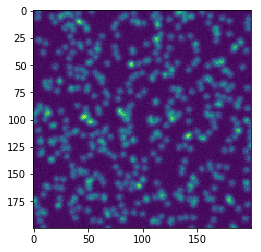

In [75]:
plt.imshow(imA)

In [56]:
coord

[array([[ 0,  1,  2, ..., 47, 48, 49],
        [ 0,  1,  2, ..., 47, 48, 49],
        [ 0,  1,  2, ..., 47, 48, 49],
        ...,
        [ 0,  1,  2, ..., 47, 48, 49],
        [ 0,  1,  2, ..., 47, 48, 49],
        [ 0,  1,  2, ..., 47, 48, 49]]), array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [47, 47, 47, ..., 47, 47, 47],
        [48, 48, 48, ..., 48, 48, 48],
        [49, 49, 49, ..., 49, 49, 49]])]

In [7]:
size = 50
x = np.arange(size)
y = np.arange(size)
coord = np.meshgrid(x, y)

GaussDat2D = FRCfuncs.twoD_Gaussian(coord, 50, 25, 25, 4, 4, 0, 0).reshape(size,size)
GaussDat2D = np.random.poisson(GaussDat2D)
np.savetxt('GaussDat2D_Amplitude50_center25x25_sigma_4x4_floats_PoissonNoise.txt', GaussDat2D, delimiter = '\t')
np.savetxt('GaussDat2D_Amplitude50_center25x25_sigma_4x4_int_PoissonNoise.txt', GaussDat2D.astype(np.int), delimiter = '\t')

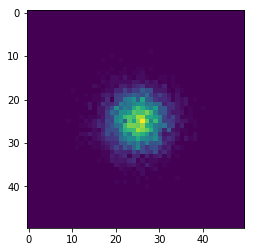

In [8]:
plt.imshow(GaussDat2D)

In [60]:
GaussDat2D.shape

(2500,)